In [37]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
plt.rcParams["figure.figsize"] = 10, 8
plt.rcParams["font.size"     ] = 14



The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [38]:
import numpy as np
import pandas as pd
import glob

In [39]:
def histoplot(df, dfvar, num_bins = 10, figsize=(6, 4), title=""):
    
    fig, ax0 = plt.subplots(1, 1, figsize=figsize)
    _, _, _ = ax0.hist(df[dfvar], num_bins, label=dfvar)
    ax0.set_xlabel(dfvar)
    ax0.set_ylabel('Events/bin')
    ax0.set_title(title)
    ax0.legend()

    fig.tight_layout()
    plt.show()

In [40]:
def select_image_from_df(evtsel = 10):
    gevt = df.groupby('event')
    n = 8
    charge_matrix = np.zeros((n, n))
    for event_number, group in gevt:
        if event_number == evtsel:
            for _, row in group.iterrows():
                sensor_id = row['sensor_id']
                charge = row['amplitude']
                charge_matrix[sensor_id // n, sensor_id % n] = charge
            break
    return charge_matrix

In [41]:
def plot_image(charge_matrix, figsize=(6, 6)):
    plt.figure(figsize=figsize)
    plt.imshow(charge_matrix, cmap='viridis', interpolation='none')
    plt.colorbar(label='Charge')
    plt.title(f'Charge Matrix for Event {evtsel}')
    plt.xlabel('Sensor X')
    plt.ylabel('Sensor Y')
    plt.show()

In [42]:
def read_histograms(filename):
    with open(filename, 'r') as file:
        lines = file.readlines()
    
    histograms = {}
    current_histogram = None
    bin_edges = []
    bin_values = []

    for line in lines:
        if line.startswith("# Histogram:"):
            if current_histogram:
                histograms[current_histogram] = (bin_edges, bin_values)
            current_histogram = line.split(":")[1].strip()
            bin_edges = []
            bin_values = []
        elif current_histogram and line.strip():
            parts = line.split()
            bin_edges.append(float(parts[0]))
            bin_edges.append(float(parts[1]))
            bin_values.append(float(parts[2]))
    
    if current_histogram:
        histograms[current_histogram] = (bin_edges, bin_values)

    return histograms


In [43]:
def plot_histogram(histograms, name, figsize=(6, 6)):
    edges, values = histograms[name]
    bin_edges = edges[::2]  # taking only the lower edges
    bin_width = edges[1] - edges[0]  # assuming uniform bin width
    
    plt.figure(figsize=figsize)    
    plt.bar(bin_edges, values, width=bin_width, align='edge')
    plt.title(f"Histogram: {name}")
    plt.xlabel("Bin")
    plt.ylabel("Count")
    plt.show()


In [44]:
def collect_images(df, n= 8):
    events = np.unique(df['event'])
    images = np.zeros((events.shape[0],n,n))
    gevt = df.groupby('event')
    i=0
    charge_matrix = np.zeros((n, n))
    for event_number, group in gevt:
        for _, row in group.iterrows():
            sensor_id = row['sensor_id']
            charge = row['amplitude']
            charge_matrix[sensor_id // n, sensor_id % n] = charge
        images[i]= charge_matrix
        i+=1
    return images

## Sensor data
- Contains a vector of times and chage

In [64]:
rootdir = "/Users/jjgomezcadenas/Data/G4Prods/crystalTest"
filenm = "sensor_data_1.csv"


In [65]:
df = pd.read_csv(f"{rootdir}/{filenm}", header=0)
df

,event,sensor_id,time,charge
0,0,57,0,161
1,0,57,1,116
2,0,57,2,92
3,0,57,3,74
4,0,57,4,53
...,...,...,...,...
1391497,999,44,14,1
1391498,999,44,16,2
1391499,999,44,21,1
1391500,999,44,23,3


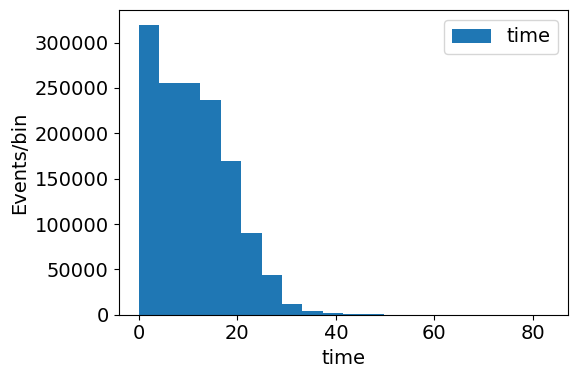

In [66]:
histoplot(df, "time", num_bins = 20, figsize=(6, 4), title="")

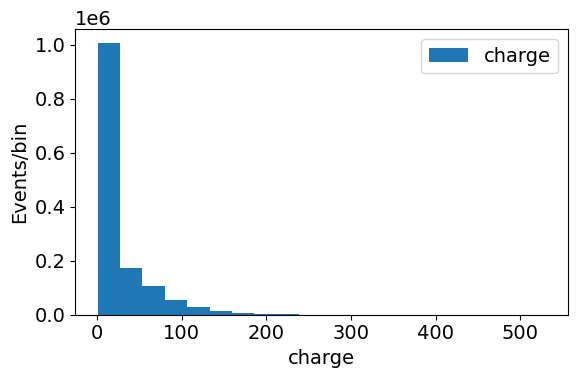

In [67]:
histoplot(df, "charge", num_bins = 20, figsize=(6, 4), title="")

## Integrated sensor data
- Sensors and chage

In [70]:
filenm = "isensor_data_1.csv"
df = pd.read_csv(f"{rootdir}/{filenm}", header=0)

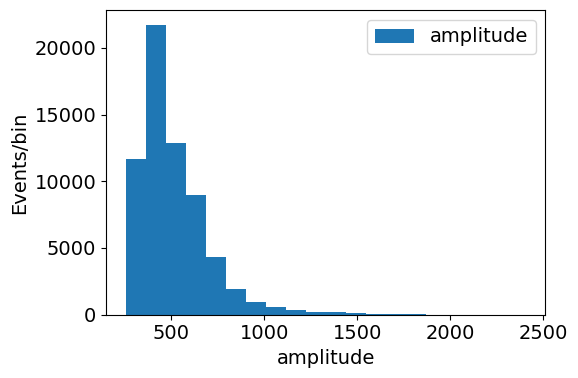

In [71]:
histoplot(df, "amplitude", num_bins = 20, figsize=(6, 4), title="")

## Plot control histograms

In [73]:
filenm = "control_histograms_1.txt"
histograms = read_histograms(f"{rootdir}/{filenm}")

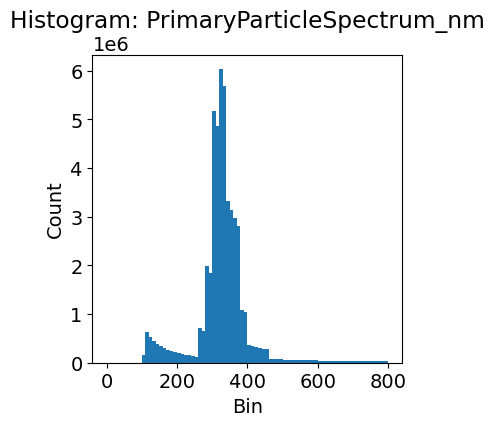

In [74]:
plot_histogram(histograms, "PrimaryParticleSpectrum_nm", figsize=(4, 4))

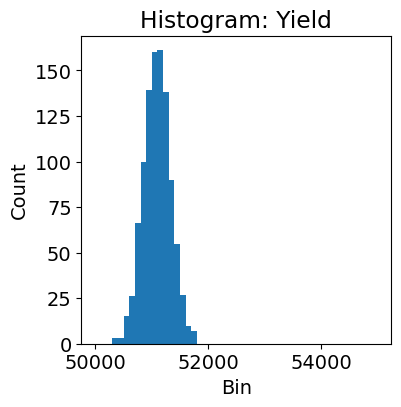

In [75]:
plot_histogram(histograms, "Yield", figsize=(4, 4))

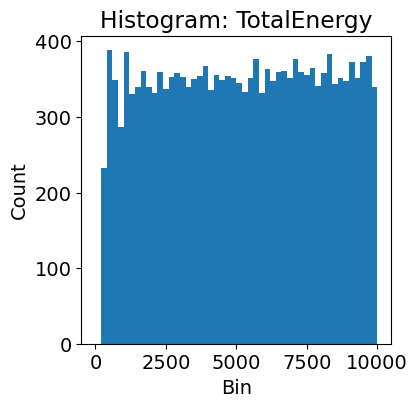

In [76]:
plot_histogram(histograms, "TotalEnergy", figsize=(4, 4))

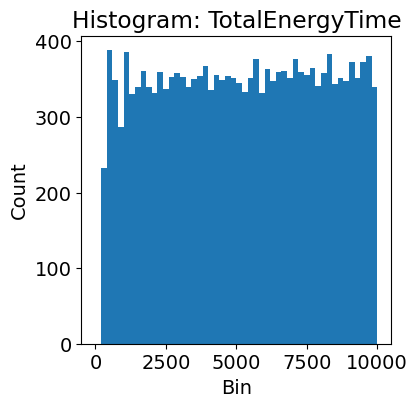

In [77]:
plot_histogram(histograms, "TotalEnergyTime", figsize=(4, 4))

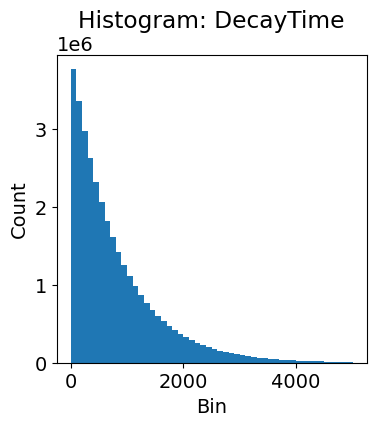

In [78]:
plot_histogram(histograms, "DecayTime", figsize=(4, 4))

### Plot a few events

In [79]:
evtsel = 0
charge_matrix = select_image_from_df(evtsel)


In [80]:
charge_matrix

array([[328., 381., 366., 363., 379., 374., 351., 324.],
       [377., 432., 412., 431., 373., 382., 384., 344.],
       [398., 424., 485., 466., 454., 413., 401., 386.],
       [429., 501., 543., 544., 545., 470., 456., 378.],
       [521., 615., 696., 617., 598., 539., 456., 398.],
       [579., 681., 747., 805., 688., 583., 494., 413.],
       [592., 793., 820., 803., 737., 571., 506., 417.],
       [579., 702., 769., 755., 644., 512., 457., 371.]])

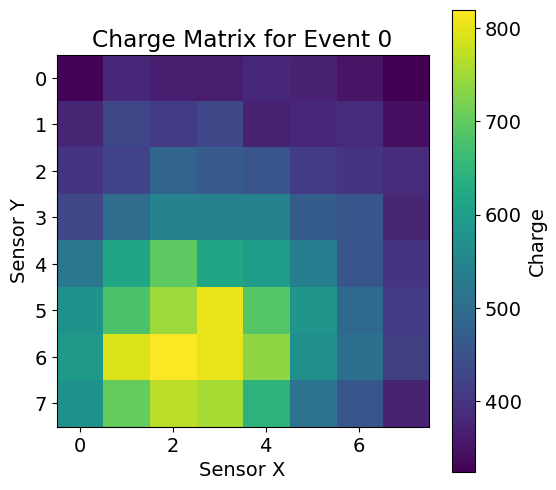

In [81]:
plot_image(charge_matrix)

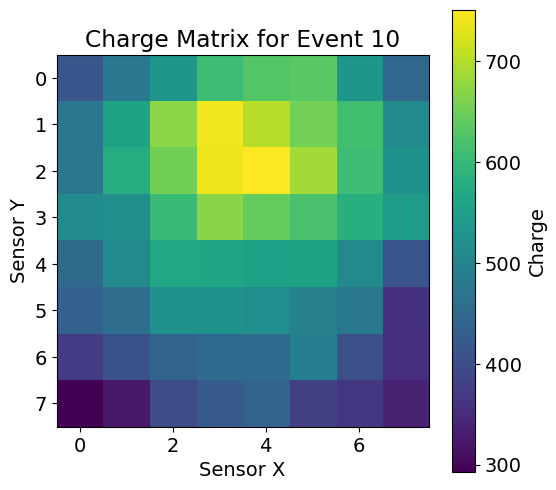

In [82]:
evtsel = 10
charge_matrix = select_image_from_df(evtsel)
plot_image(charge_matrix)

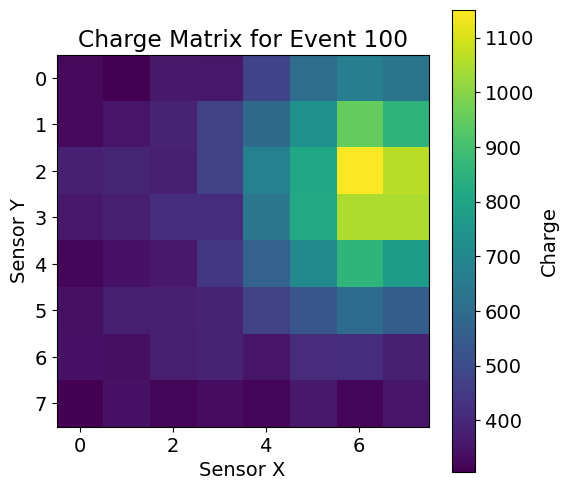

In [83]:
evtsel = 100
charge_matrix = select_image_from_df(evtsel)
plot_image(charge_matrix)

In [84]:
images = collect_images(df)

In [85]:
images.shape

(1000, 8, 8)

In [86]:
np.save('images_1.npy', images)

In [87]:
images = np.load('images_1.npy')

In [88]:
images.shape

(1000, 8, 8)

In [89]:
images

array([[[ 328.,  381.,  366., ...,  374.,  351.,  324.],
        [ 377.,  432.,  412., ...,  382.,  384.,  344.],
        [ 398.,  424.,  485., ...,  413.,  401.,  386.],
        ...,
        [ 579.,  681.,  747., ...,  583.,  494.,  413.],
        [ 592.,  793.,  820., ...,  571.,  506.,  417.],
        [ 579.,  702.,  769., ...,  512.,  457.,  371.]],

       [[ 614.,  694.,  585., ...,  426.,  325.,  343.],
        [ 731.,  809.,  794., ...,  472.,  421.,  377.],
        [ 768.,  848.,  789., ...,  529.,  428.,  416.],
        ...,
        [ 434.,  555.,  538., ...,  446.,  410.,  391.],
        [ 397.,  444.,  471., ...,  356.,  407.,  367.],
        [ 333.,  401.,  380., ...,  368.,  367.,  339.]],

       [[ 324.,  343.,  333., ...,  318.,  364.,  344.],
        [ 337.,  360.,  359., ...,  361.,  383.,  352.],
        [ 493.,  473.,  408., ...,  403.,  416.,  353.],
        ...,
        [1285., 1218.,  852., ...,  411.,  355.,  342.],
        [1039., 1055.,  729., ...,  393.,  35